# Import Data

In [1]:
#import DataFetcher class from file heart_data.py
import DataFetcher #importing the file DataFetcher.py from the folder data
data_fetcher = DataFetcher.DataFetcher("C:\\Users\\kruth\\OneDrive\\Desktop\\Cardiac_Events_ML\\preprocessing\\final_dataset.csv")
X_train = data_fetcher.get_X_train()
X_test = data_fetcher.get_X_test()
y_train = data_fetcher.get_y_train()
y_test = data_fetcher.get_y_test()
features = data_fetcher.get_features()
target_names = data_fetcher.get_target_names()
X = data_fetcher.get_X()
y = data_fetcher.get_y()


------class run complete------



# Feature Scaling

In [2]:
#scaling the feature dataset:
from sklearn.preprocessing import StandardScaler 
#formula for scaling: x_scaled = (x - mean)/std_deviation
# fit the Scaler
scaler = StandardScaler() #creating an instance of the StandardScaler class.
#Scaling the values such that the mean is 0 and std deviation is 1.
scaler.fit(X_train) #fitting the scaler to the training set.
X_train = scaler.transform(X_train) #transforming the training set. 
X_test = scaler.transform(X_test) #transforming the testing set.

# Initial Model

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize the model
svm = SVC()

# Fit the model to the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred_1 = svm.predict(X_test)

#---------------------------------Evaluating the model---------------------------------

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n----------Initial SVM Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred_1))
print("Precision:", precision_score(y_test, y_pred_1))
print("Recall:", recall_score(y_test, y_pred_1))
print("F1 Score:", f1_score(y_test, y_pred_1))

#classification_report
print("\n----------Initial Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_1)
print(cr)


----------Initial SVM Metrics----------

Accuracy: 0.8833333333333333
Precision: 0.8717948717948718
Recall: 0.9444444444444444
F1 Score: 0.9066666666666667

----------Initial Classification Report----------

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        24
           1       0.87      0.94      0.91        36

    accuracy                           0.88        60
   macro avg       0.89      0.87      0.88        60
weighted avg       0.88      0.88      0.88        60



## Confusion Matrix for Initial Model


----------Initial Confusion Matrix----------

[[19  5]
 [ 2 34]]


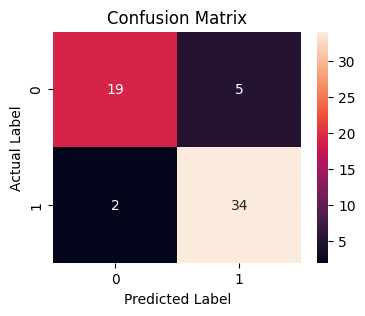

In [9]:
#confusion_matrix
print("\n----------Initial Confusion Matrix----------\n")
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_1)
print(cm)

#visualizing the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
axes, fig = plt.subplots(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

# Grid Search

NOTE: The results of Grid Search are not taken into account for the final model as it doesn't give good accuracy but it was observed that the model given by Grid Search generalising well on the test data. This was seen in cross validation.

In [34]:
#perform Grid Search to find the best parameters for the model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np
param_grid = {'C': np.arange(0.1, 5.0),
                'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
                'gamma': ['scale', 'auto']
                }

grid = GridSearchCV(SVC(random_state = 42), param_grid, cv = 3, scoring='accuracy', verbose = 3, n_jobs = -1)
svm_not_used = grid.fit(X_train, y_train)

# Print the best parameters
print("best parameters: ", grid.best_params_)
print("best score: ", grid.best_score_)
print("best estimator: ", grid.best_estimator_)

                

Fitting 3 folds for each of 40 candidates, totalling 120 fits
best parameters:  {'C': 1.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
best score:  0.8160337552742617
best estimator:  SVC(C=1.1, kernel='sigmoid', random_state=42)


# Final Model

In [37]:
# Initialize the tuned model
from sklearn.svm import SVC
svm = SVC(C=1.1 , kernel = 'linear', gamma = 'auto', random_state=42, probability=True)
# kernel = 'linear' kernel means that the data is linearly separable.
# gamma = 'auto' gamma is the parameter for the kernel, which determines the influence of a single training example.
# here, gamma = 'auto' = 1/n_features.
# C is the penalty parameter for the error term. 
# It controls the trade off between smooth decision boundary and classifying the training points correctly.
# Probability = True is used to get the probability of the prediction, which is used in the ROC curve.

# Fit the model to the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

#---------------------------------Evaluating the model---------------------------------

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n----------Tuned SVM Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

#classification_report
print("\n----------Tuned Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)




----------Tuned SVM Metrics----------

Accuracy: 0.9166666666666666
Precision: 0.8974358974358975
Recall: 0.9722222222222222
F1 Score: 0.9333333333333333

----------Tuned Classification Report----------

              precision    recall  f1-score   support

           0       0.95      0.83      0.89        24
           1       0.90      0.97      0.93        36

    accuracy                           0.92        60
   macro avg       0.92      0.90      0.91        60
weighted avg       0.92      0.92      0.92        60



## Confusion Matrix 


----------Final Confusion Matrix----------

[[20  4]
 [ 1 35]]


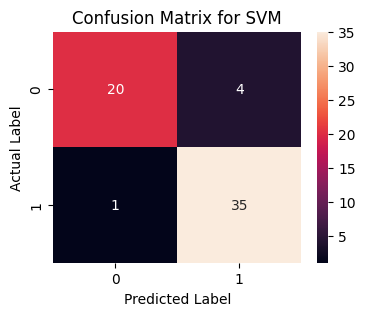

In [38]:
#confusion_matrix
print("\n----------Final Confusion Matrix----------\n")
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#visualizing the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
axes, fig = plt.subplots(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix for SVM")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

## Cross Validation

In [39]:
#cross validation for 10 folds
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm, X_train, y_train, cv=10, scoring="f1") #scoring can be accuracy, precision, recall, f1, roc_auc, etc
#get the scores for each fold
for i in range(10):
    print("Fold", i, ":", scores[i])
    
#get the mean of the scores
print("\nMean:", scores.mean())
#get the standard deviation of the scores
print("Standard Deviation:", scores.std()) #standard deviation is calculated for the scores of each fold
#A low standard deviation indicates that the model is consistent in its performance across different subsets of the data, which is a good sign.
#get the variance of the scores
print("Variance:", scores.var()) #variance is calculated for the scores of each fold
#A low variance indicates that the model is consistent in its performance across different subsets of the data, which is a good sign.

Fold 0 : 0.7586206896551724
Fold 1 : 0.8461538461538461
Fold 2 : 0.8333333333333333
Fold 3 : 0.896551724137931
Fold 4 : 0.7692307692307693
Fold 5 : 0.8275862068965517
Fold 6 : 0.8275862068965517
Fold 7 : 0.8461538461538461
Fold 8 : 0.8695652173913043
Fold 9 : 0.6923076923076924

Mean: 0.8167089532156998
Standard Deviation: 0.05702609360150501
Variance: 0.0032519753514476113


## ROC

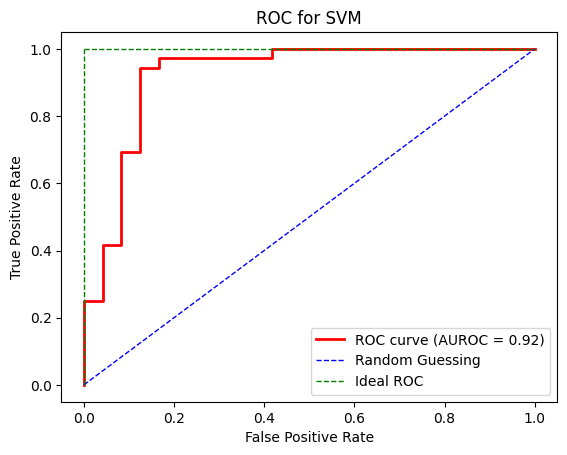

In [40]:
#plot the ROC curve
from sklearn.metrics import roc_curve, auc
y_pred_proba = svm.predict_proba(X_test)[:,1] #get the probabilities of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

#plot the ROC curve
plt.figure()
plt.plot(fpr, tpr,'r', lw=2, label='ROC curve (AUROC = %0.2f)' % roc_auc)

#plot the random guessing line and the ideal roc line
plt.plot([0,1],[0,1],"b--", linewidth = 1, label = "Random Guessing")
plt.plot([0,1],[1,1], "g--", linewidth = 1, label = "Ideal ROC")
plt.plot([0,0],[0,1], "g--", linewidth = 1)

#plot the axis labels and the title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for SVM')
plt.legend(loc="lower right")
plt.show()


## PRC

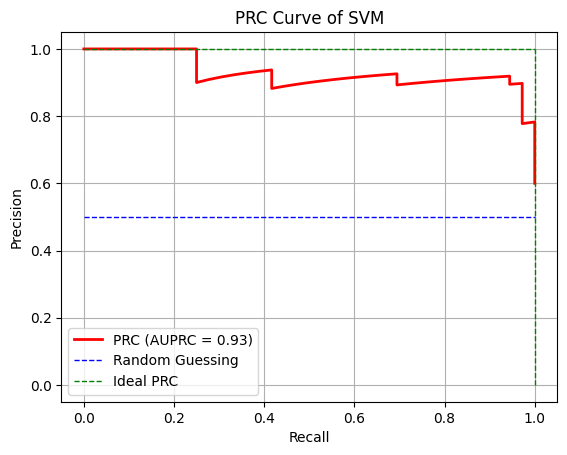

In [47]:
# plot PRC for the model
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

#plot the PRC curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)  # _ is a placeholder for the threshold values
average_precision = average_precision_score(y_test, y_pred_proba).round(2)
plt.plot(recall, precision,'r', label="PRC (AUPRC = %0.2f)" % average_precision, linewidth = 2)
#average precision is the area under the PRC curve

#plot the ideal PRC curve and random guessing PRC curve
plt.plot([0,1],[0.5,0.5],"b--", linewidth = 1, label = "Random Guessing")
plt.plot([0,1],[1,1], "g--", linewidth = 1, label = "Ideal PRC")
plt.plot([1,1],[0,1], "g--", linewidth = 1)

#set up the plot
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC Curve of SVM")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Learning Curve

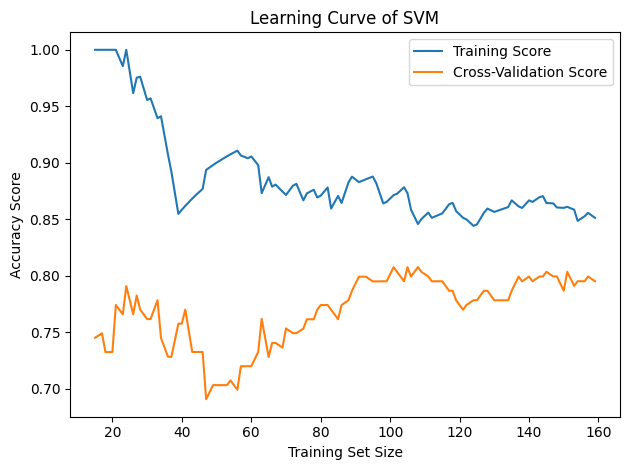

In [46]:
#plot the learning curve for the model
#use Recall as the scoring metric because the model should idealy minimize the number of false negatives.
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(svm, X_train, y_train, cv=3, scoring="accuracy",n_jobs=-1, train_sizes=np.linspace(0.1,1.0,100))
#train_sizes: the proportion of the training set to include in the learning curve.
#train_sizes=np.linspace(0.1,1.0,4) means the training set size will be 10%, 40%, 70%, and 100% of the training set.
#train_scores: the scores for each training subset
#test_scores: the scores for each testing subset

#plot the learning curve
import matplotlib.pyplot as plt
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-Validation Score")
plt.title("Learning Curve of SVM")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout() 
plt.show()
#The training score is the average of the scores of each training subset.
#The cross-validation score is the average of the scores of each testing subset.
# we can see that the training score is high and the cross-validation score is low, which means the model is overfitting the data.
#The model is not generalizing well to the testing data.
# it shows that more training data NOT necessarily improves the model performance.
